In [4]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [5]:
api_key='{Enter your google API Key}'
# channel_id='UCnz-ZXXER4jOvuED5trXfEA'

channel_ids = ["UCnz-ZXXER4jOvuED5trXfEA", # techTFQ
               "UCLLw7jmFsvfIVaUFsLs8mlQ", # Luke Barousse
               "UCiT9RITQ9PW6BhXK0y2jaeg", # Ken Jee
               "UC7cs8q-gJRlGwj4A8OmCmXg", # Alex the Analyst
               "UC2UXDak6o7rBm23k3Vv5dww"  # Tina Huang
              ]

youtube = build('youtube','v3', developerKey=api_key)

# Scrape and analyse different youtube channels and their statistics

## Function to get channel statistics

In [6]:
def get_channel_stat(youtube, channel_ids):
    all_data = []
    
    request = youtube.channels().list(
                part="snippet,contentDetails,statistics",
                id= ','.join(channel_ids))
    response = request.execute()

    for i in range(len(response["items"])):
        data = dict(Channel_name = response["items"][i]["snippet"]["title"],
                    Subscribers = response["items"][i]["statistics"]["subscriberCount"],
                    Views = response["items"][i]["statistics"]["viewCount"],
                    Total_videos = response["items"][i]["statistics"]["videoCount"],
                    Playlist_id = response["items"][i]["contentDetails"]["relatedPlaylists"]["uploads"]
                   )
        all_data.append(data)
        
    return all_data

In [7]:
channel_statistics = get_channel_stat(youtube, channel_ids)

In [8]:
channel_data = pd.DataFrame(channel_statistics)

In [9]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Ken Jee,255000,8731417,286,UUiT9RITQ9PW6BhXK0y2jaeg
1,Luke Barousse,396000,19084981,146,UULLw7jmFsvfIVaUFsLs8mlQ
2,techTFQ,255000,13402042,100,UUnz-ZXXER4jOvuED5trXfEA
3,Alex The Analyst,643000,27352416,269,UU7cs8q-gJRlGwj4A8OmCmXg
4,Tina Huang,593000,27385332,164,UU2UXDak6o7rBm23k3Vv5dww


In [10]:
channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_videos    object
Playlist_id     object
dtype: object

In [11]:
# convert Subscribers, Views, Total_videos in numeric format

channel_data["Subscribers"] = pd.to_numeric(channel_data["Subscribers"])
channel_data["Views"] = pd.to_numeric(channel_data["Views"])
channel_data["Total_videos"] = pd.to_numeric(channel_data["Total_videos"])

In [12]:
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
Playlist_id     object
dtype: object

### Bar graph show the result of subscribers of different channels

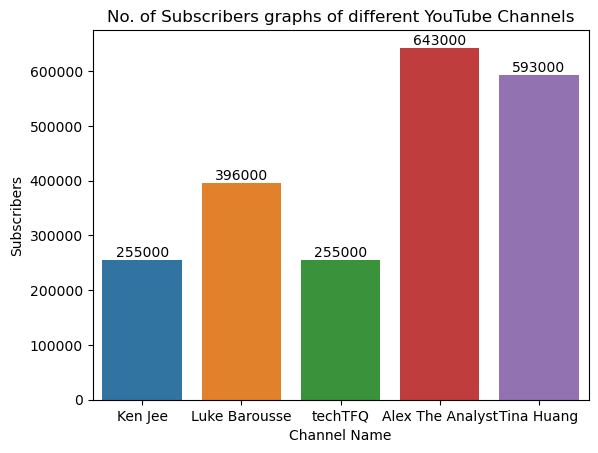

In [19]:
ax = sns.barplot(x="Channel_name", y="Subscribers", data=channel_data, hue="Channel_name", width=0.8, dodge=False)
ax.set_title("No. of Subscribers graphs of different YouTube Channels")
ax.set_xlabel("Channel Name")
ax.set_ylabel("Subscribers")
ax.legend_.remove()

for bars in ax.containers:
    ax.bar_label(bars)

### Bar graph show the result of total views of different channels

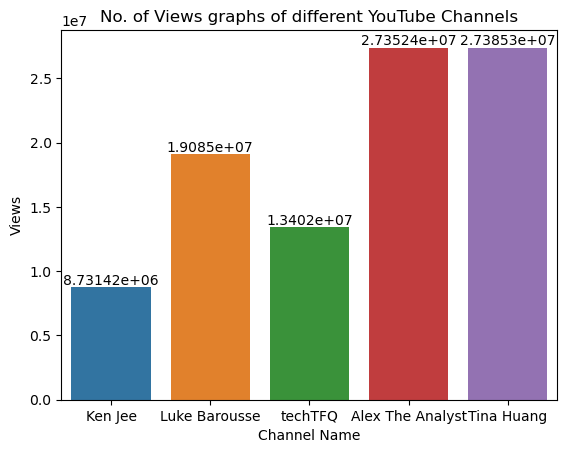

In [20]:
ax = sns.barplot(x="Channel_name", y="Views", data=channel_data, hue="Channel_name", dodge=False)
ax.set_title("No. of Views graphs of different YouTube Channels")
ax.set_xlabel("Channel Name")
ax.set_ylabel("Views")
ax.legend_.remove()

for bars in ax.containers:
    ax.bar_label(bars)

### Bar graph show the result of total no of videos of different channels

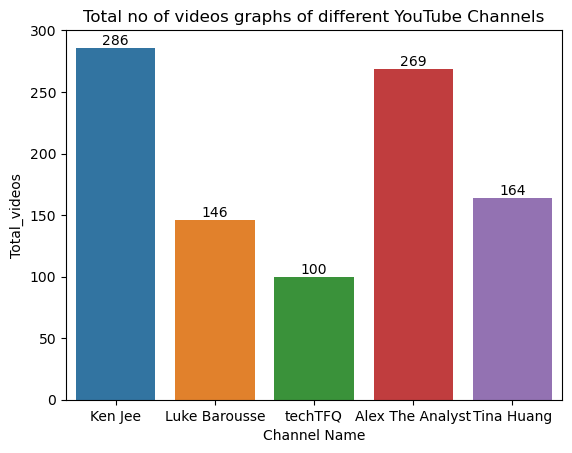

In [23]:
ax = sns.barplot(x="Channel_name", y="Total_videos", data=channel_data, hue="Channel_name", dodge=False)
ax.set_title("Total no of videos graphs of different YouTube Channels")
ax.set_xlabel("Channel Name")
ax.set_ylabel("Total_videos")
ax.legend_.remove()

for bars in ax.containers:
    ax.bar_label(bars)

# Scrape a youtube channel and find the different type of insight from it.

## Function to get video ids

In [24]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Ken Jee,255000,8731417,286,UUiT9RITQ9PW6BhXK0y2jaeg
1,Luke Barousse,396000,19084981,146,UULLw7jmFsvfIVaUFsLs8mlQ
2,techTFQ,255000,13402042,100,UUnz-ZXXER4jOvuED5trXfEA
3,Alex The Analyst,643000,27352416,269,UU7cs8q-gJRlGwj4A8OmCmXg
4,Tina Huang,593000,27385332,164,UU2UXDak6o7rBm23k3Vv5dww


In [25]:
playlist_id = channel_data.loc[channel_data["Channel_name"]=="Alex The Analyst", "Playlist_id"].iloc[0]

In [26]:
def get_video_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
                    part= "contentDetails",
                    playlistId= playlist_id,
                    maxResults = 50)

    response = request.execute()

    all_video_ids = []
    for i in range(len(response["items"])):
        v_id = response["items"][i]["contentDetails"]["videoId"]
        all_video_ids.append(v_id)

    next_page_token = response.get("nextPageToken")
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                    part= "contentDetails",
                    playlistId= playlist_id,
                    maxResults = 50,
                    pageToken= next_page_token)

            response = request.execute()

            for i in range(len(response["items"])):
                v_id = response["items"][i]["contentDetails"]["videoId"]
                all_video_ids.append(v_id)

            next_page_token = response.get("nextPageToken")
            
    return all_video_ids
    

In [27]:
video_ids = get_video_ids(youtube, playlist_id)

In [28]:
video_ids

['qPOmj22QX04',
 'XD1ul5fpnGI',
 'kifhSqep9UM',
 'dCNjUOc1cBY',
 'lEjmgE-hogg',
 'qxj3dx0c7RM',
 'zgYqUP_PhQo',
 'MARn_mssG4A',
 'TGAUZQJaQbQ',
 'HYD8KjPB9F8',
 'wgRwITQHszU',
 '1LG65qXfeQY',
 'QzLz-W29Tww',
 'ukIUVW2E-n0',
 'aofB2t5o2ao',
 '-DwpkgtJjGw',
 'h4KTy2wxYcQ',
 'LaRXtE4OG9A',
 'J0PcCv9f4JQ',
 '_DGn-7134i0',
 'EflE8U30pBo',
 'j_sHaBJEHMk',
 'xuyKzpJ2SaY',
 'D0mEy6bJ2lA',
 'GaoAc3-hScQ',
 'bxIF9X9k2IE',
 'z_xWpa88R0A',
 '7PoZBuIUnEU',
 'fq1-e-GbihE',
 'Xkb6h3YXl_c',
 'qDprq7Xbrqw',
 'UOHxb9ndpMM',
 '_h_A_n8Z9QQ',
 '_oCUSMX4_3k',
 'OnS01G8W6nw',
 'ugkyfUTc6AU',
 'eON-PNPae8Y',
 '41nX2ZgGzcE',
 'Le35Qsgs2lM',
 'nufF-juSZxU',
 '9NB5u17qiDY',
 'YDvJqgBv0Uc',
 'j6A28L6Tmxw',
 'W_s4c1vLGXM',
 'DWte9zjGl0I',
 'EzeeypMKx7o',
 'OISvlkfbntY',
 '8dTpNajxaH0',
 'oreAsJTNcsA',
 'xjA1HjvmoMY',
 'LO7hzmoHEIE',
 'bargNl2WeN4',
 'q-kbzWjyPak',
 'PExdWWcxmro',
 'Liv6eeb1VfE',
 'fHK4nHbUtj0',
 '5l2d_Rv0odE',
 'bDhvCp3_lYw',
 'IMU1V-JugKo',
 'FpgkpjSyBOw',
 '6jtS3Hz19kc',
 'JpSMse3eVVg',
 'TPivN7

## Functions to get videos details

In [29]:
def get_video_details(youtube, video_ids):
    all_videos_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                        part="snippet,contentDetails,statistics",
                        id=','.join(video_ids[i:i+50]))
        response = request.execute()

        for video in response["items"]:
            video_stats = dict(Title = video["snippet"]["title"],
                               Published_date = video["snippet"]["publishedAt"],
                               Views = video["statistics"]["viewCount"],
                               Likes = video["statistics"]["likeCount"],
                               Favorites = video["statistics"]["favoriteCount"],
                               Comments = video["statistics"]["commentCount"])
            all_videos_stats.append(video_stats)
        
    return all_videos_stats
        

In [30]:
video_details = get_video_details(youtube, video_ids)

In [31]:
video_data = pd.DataFrame(video_details)

In [32]:
video_data

,Title,Published_date,Views,Likes,Favorites,Comments
0,Practice SQL and Python right on your Phone!,2023-12-13T16:12:42Z,1397,132,0,5
1,Analyst Builder Full Launch! | The Learning Pl...,2023-12-12T13:00:21Z,4510,309,0,40
2,Analyst Builder Full Launch LiveStream | 20% O...,2023-12-11T19:04:05Z,9465,453,0,9
3,Having vs Where in MySQL | Beginner MySQL Series,2023-12-05T13:00:35Z,4542,182,0,14
4,#Excel is Frustrating,2023-11-29T18:00:02Z,4221,280,0,7
...,...,...,...,...,...,...
264,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30T14:07:55Z,66174,1572,0,64
265,Working at a Big Company Vs Small Company | To...,2020-01-25T16:38:39Z,14518,397,0,20
266,Data Analyst Salary | 100k with No Experience,2020-01-23T03:16:09Z,62106,2151,0,227
267,Truth About Big Companies | Told by a Fortune ...,2020-01-21T03:52:15Z,8125,305,0,18


In [33]:
video_data.dtypes

Title             object
Published_date    object
Views             object
Likes             object
Favorites         object
Comments          object
dtype: object

In [34]:
# Modify all the data to format correctly
video_data["Published_date"] = pd.to_datetime(video_data["Published_date"]).dt.date
video_data["Views"] = pd.to_numeric(video_data["Views"])
video_data["Likes"] = pd.to_numeric(video_data["Likes"])
video_data["Favorites"] = pd.to_numeric(video_data["Favorites"])
video_data["Comments"] = pd.to_numeric(video_data["Comments"])


In [35]:
video_data

,Title,Published_date,Views,Likes,Favorites,Comments
0,Practice SQL and Python right on your Phone!,2023-12-13,1397,132,0,5
1,Analyst Builder Full Launch! | The Learning Pl...,2023-12-12,4510,309,0,40
2,Analyst Builder Full Launch LiveStream | 20% O...,2023-12-11,9465,453,0,9
3,Having vs Where in MySQL | Beginner MySQL Series,2023-12-05,4542,182,0,14
4,#Excel is Frustrating,2023-11-29,4221,280,0,7
...,...,...,...,...,...,...
264,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30,66174,1572,0,64
265,Working at a Big Company Vs Small Company | To...,2020-01-25,14518,397,0,20
266,Data Analyst Salary | 100k with No Experience,2020-01-23,62106,2151,0,227
267,Truth About Big Companies | Told by a Fortune ...,2020-01-21,8125,305,0,18


In [36]:
top10_videos = video_data.sort_values(by="Views", ascending=False).head(10)

In [37]:
top10_videos

,Title,Published_date,Views,Likes,Favorites,Comments
174,Data Analyst Portfolio Project | SQL Data Expl...,2021-05-04,1576869,29379,0,3585
257,SQL Basics Tutorial For Beginners | Installing...,2020-03-01,1091990,15132,0,1746
232,Top 5 Reasons Not to Become a Data Analyst,2020-08-12,914527,19689,0,1052
234,What Does a Data Analyst Actually Do?,2020-07-29,849500,16927,0,455
78,How to Become a Data Analyst in 2023 (Complete...,2023-01-31,835022,30766,0,919
240,Data Scientist vs Data Analyst | Which Is Righ...,2020-06-10,753924,23599,0,850
237,Data Analyst vs Business Analyst | Which Is Ri...,2020-07-03,731100,18815,0,573
77,FREE Data Analyst Bootcamp!!,2023-02-07,690724,25072,0,1197
128,Database vs Data Warehouse vs Data Lake | What...,2022-04-26,551878,15124,0,249
134,Full Project in Excel | Excel Tutorials for Be...,2022-03-22,530430,12140,0,784


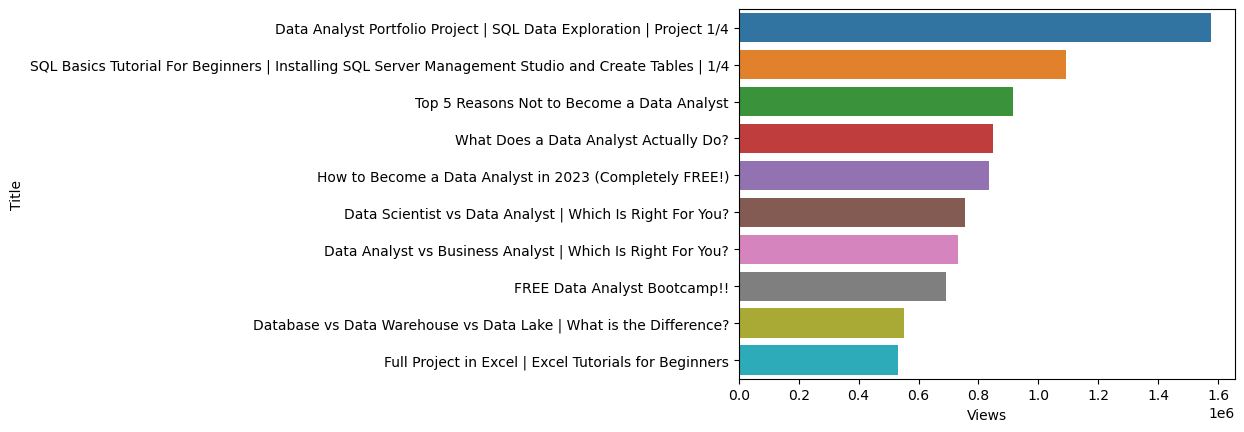

In [42]:
ax1 = sns.barplot(x="Views", y="Title", data=top10_videos, hue="Title", dodge=False)
ax1.legend_.remove()

# for bars in ax1.containers:
#     ax1.bar_label(bars)

In [43]:
video_data

,Title,Published_date,Views,Likes,Favorites,Comments
0,Practice SQL and Python right on your Phone!,2023-12-13,1397,132,0,5
1,Analyst Builder Full Launch! | The Learning Pl...,2023-12-12,4510,309,0,40
2,Analyst Builder Full Launch LiveStream | 20% O...,2023-12-11,9465,453,0,9
3,Having vs Where in MySQL | Beginner MySQL Series,2023-12-05,4542,182,0,14
4,#Excel is Frustrating,2023-11-29,4221,280,0,7
...,...,...,...,...,...,...
264,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30,66174,1572,0,64
265,Working at a Big Company Vs Small Company | To...,2020-01-25,14518,397,0,20
266,Data Analyst Salary | 100k with No Experience,2020-01-23,62106,2151,0,227
267,Truth About Big Companies | Told by a Fortune ...,2020-01-21,8125,305,0,18


In [44]:
# Analyse how many videos posted by month
video_data["Month"] = pd.to_datetime(video_data["Published_date"]).dt.strftime("%b")

In [45]:
video_data

,Title,Published_date,Views,Likes,Favorites,Comments,Month
0,Practice SQL and Python right on your Phone!,2023-12-13,1397,132,0,5,Dec
1,Analyst Builder Full Launch! | The Learning Pl...,2023-12-12,4510,309,0,40,Dec
2,Analyst Builder Full Launch LiveStream | 20% O...,2023-12-11,9465,453,0,9,Dec
3,Having vs Where in MySQL | Beginner MySQL Series,2023-12-05,4542,182,0,14,Dec
4,#Excel is Frustrating,2023-11-29,4221,280,0,7,Nov
...,...,...,...,...,...,...,...
264,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30,66174,1572,0,64,Jan
265,Working at a Big Company Vs Small Company | To...,2020-01-25,14518,397,0,20,Jan
266,Data Analyst Salary | 100k with No Experience,2020-01-23,62106,2151,0,227,Jan
267,Truth About Big Companies | Told by a Fortune ...,2020-01-21,8125,305,0,18,Jan


In [46]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [47]:
videos_per_month

,Month,size
0,Apr,19
1,Aug,28
2,Dec,22
3,Feb,19
4,Jan,24
5,Jul,18
6,Jun,18
7,Mar,23
8,May,22
9,Nov,23


In [48]:
sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [49]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [50]:
videos_per_month = videos_per_month.sort_index()

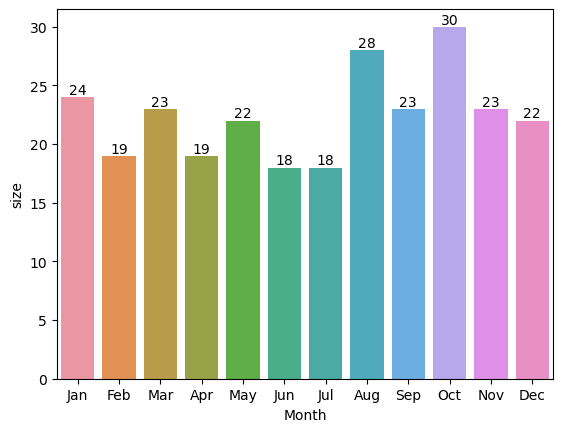

In [52]:
ax2 = sns.barplot(x='Month', y='size', data= videos_per_month, hue='Month', dodge=False)
ax2.legend_.remove()

for bars in ax2.containers:
    ax2.bar_label(bars)

In [53]:
# Save all the video data of channel in csv file

video_data.to_csv('Video_details(Alex The Analyst).csv')